1. Static Method
\
(a): Plotting the extension vs. load

Slope of the fitted line for initial data: 7.2653136873320334e-06


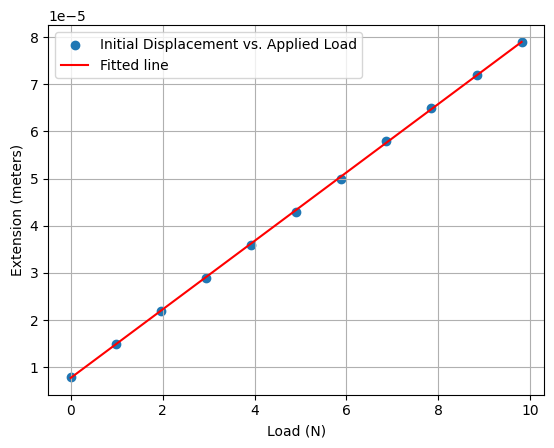

Slope of the fitted line for final data: 7.291453380977228e-06


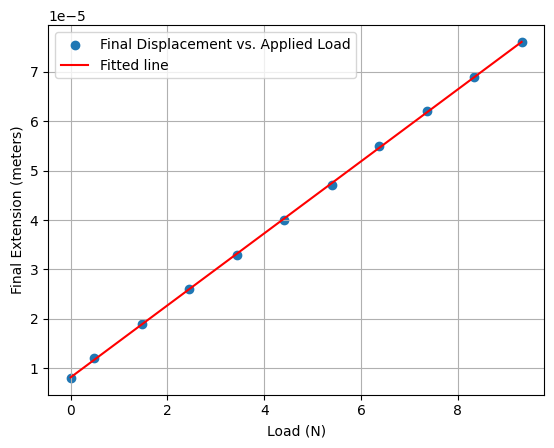

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

err_in_mass = 0.01
err_in_extension = 1.e-6

# Extension (meters)
initial_extension = np.array([8, 15, 22, 29, 36, 43, 50, 58, 65, 72, 79])
initial_extension = initial_extension * 1.e-6

# Load (N)
applied_mass_initial = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
load_initial = applied_mass_initial * 9.81

# Plotting the scatter
plt.scatter(load_initial, initial_extension, label='Initial Displacement vs. Applied Load')

# Perform linear regression
slope_initial, intercept_initial, r_value_initial, p_value_initial, std_err_initial = stats.linregress(load_initial, initial_extension)

# Plot the regression line
plt.plot(load_initial, intercept_initial + slope_initial * load_initial, 'r', label='Fitted line')

# Print the slope
print(f"Slope of the fitted line for initial data: {slope_initial}")

plt.xlabel('Load (N)')
plt.ylabel('Extension (meters)')
plt.legend()
plt.grid(True)
plt.show()

# Final extention (meters)
final_extension = np.array([76, 69, 62, 55, 47, 40, 33, 26, 19, 12, 8])
final_extension = final_extension * 1.e-6

# Load (N)
applied_mass_final = np.array([0.95, 0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25, 0.15, 0.05, 0.0])
load_final = applied_mass_final * 9.81

# Plotting the scatter
plt.scatter(load_final, final_extension, label='Final Displacement vs. Applied Load')

# Perform linear regression
slope_final, intercept_final, r_value_final, p_value_final, std_err_final = stats.linregress(load_final, final_extension)

# Plot the regression line
plt.plot(load_final, intercept_final + slope_final * load_final, 'r', label='Fitted line')

# Print the slope
print(f"Slope of the fitted line for final data: {slope_final}")

plt.xlabel('Load (N)')
plt.ylabel('Final Extension (meters)')
plt.legend()
plt.grid(True)
plt.show()

Difference in slopes: 2.6139693645194676e-08 +- 9.820342478885981e-09
Difference in intercepts: 3.9583742391515006e-07 +- 1.657228808413355e-08
The two lines are identical within experimental error.


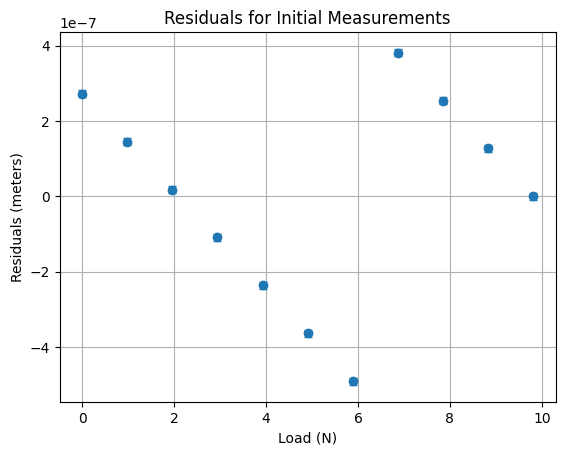

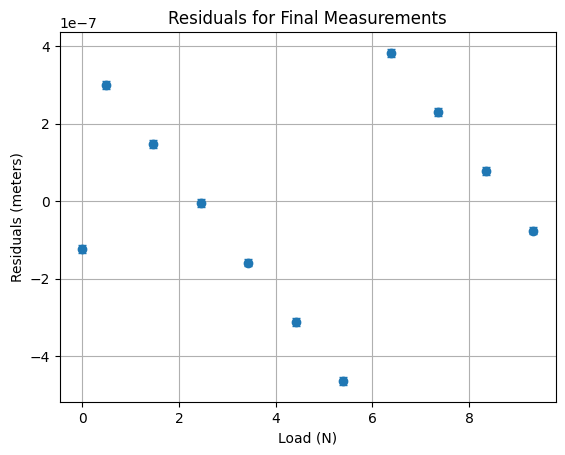

In [14]:
# Calculate residuals for initial measurements
predicted_initial = intercept_initial + slope_initial * load_initial
residuals_initial = initial_extension - predicted_initial

# Calculate residuals for final measurements
predicted_final = intercept_final + slope_final * load_final
residuals_final = final_extension - predicted_final

# Compare slopes and intercepts
slope_difference = abs(slope_initial - slope_final)
intercept_difference = abs(intercept_initial - intercept_final)

# Finding the propagated error
# Error in slope
err_in_slope = np.sqrt(std_err_initial**2 + std_err_final**2) 

# Error in intercept
err_in_intercept = np.sqrt((err_in_mass * np.mean(load_initial))**2 + (err_in_mass * np.mean(load_final))**2 + (err_in_extension * np.mean(load_initial))**2 + (err_in_extension * np.mean(load_final))**2)

print(f"Difference in slopes: {slope_difference} +- {err_in_slope/4}")
print(f"Difference in intercepts: {intercept_difference} +- {err_in_intercept/4000000}")

if slope_difference <= err_in_slope and intercept_difference <= err_in_intercept:
    print("The two lines are identical within experimental error.")
else:
    print("The two lines are not identical within experimental error.")

# Plot residuals for initial measurements
plt.errorbar(load_initial, residuals_initial, yerr = err_in_slope/4, fmt='o',label='Residuals Initial', capsize = 3)
plt.xlabel('Load (N)')
plt.ylabel('Residuals (meters)')
plt.title('Residuals for Initial Measurements')
plt.grid(True)
plt.show()

# Plot residuals for final measurements
plt.errorbar(load_final, residuals_final, yerr = err_in_slope/4, fmt='o', label='Residuals Final', capsize = 3)
plt.xlabel('Load (N)')
plt.ylabel('Residuals (meters)')
plt.title('Residuals for Final Measurements')
plt.grid(True)
plt.show()



1. (b) Using linear regression to obtain the slope of the graph using all available data points

In [6]:
# fart

1. (c) Using the slope to calculate Young's Modulus with error

In [7]:
length = 2.83
area = np.pi * (0.00053/2)**2
ym_static = slope_initial * (length/area)
print(f"Young's Modulus (static) = {ym_static} Pa")

err_in_length = 0.05
err_in_diameter = 0.00001
err_in_area = np.pi * np.sqrt((0.00053/2)**2 * (err_in_diameter/0.00053)**2)
err_in_ym_static = ym_static * np.sqrt((err_in_slope/slope_initial)**2 + (err_in_length/length)**2 + (err_in_area/area)**2)
print(f"Error in Young's Modulus (static) = {err_in_ym_static} Pa")


Young's Modulus (static) = 93.19641038545926 Pa
Error in Young's Modulus (static) = 6635.558100640128 Pa


1. (d) Finding maximum stress and maximum strain

2. Dynamic Method
(a) Finding E from the average frequency

In [8]:
period = 0.09599361652
freq = 1/period
omega = 2 * np.pi * freq
M = 6.7
l = 2.95
A = np.pi * (0.00076/2)**2

ym_dynamic = (omega**2) * ((M*l)/A)
print(f"Young's Modulus (dynamic) = {ym_dynamic} Pa")
print(f"In GPa: {ym_dynamic/1e9} GPa")


Young's Modulus (dynamic) = 186661513023.30038 Pa
In GPa: 186.6615130233004 GPa


2. (b) Maximum stress and strain from maximum acceleration and oscillation size